<a href="https://colab.research.google.com/github/Mohammad-Amirifard/NLP_Tutorial/blob/main/02_Building_a_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learn Natural Language Processing better in a practical Mode**

Created By [Mohammad Amirifard](https://www.linkedin.com/in/mohammad-amirifard/)


<img src="https://th.bing.com/th/id/R.481b9fae699f7619971167cade786c60?rik=PWShnQ5jIirVIA&riu=http%3a%2f%2fwww.marktechpost.com%2fwp-content%2fuploads%2f2022%2f11%2f233-scaled.jpg&ehk=hvDRc3N3UsK9xB5jAui%2b9p1VW98U8f6uUCoUncfmRbY%3d&risl=&pid=ImgRaw&r=0" alt="Image" width="800" height="400" />

# **Structure of notebooks**
`This NLP Tutorial includes several notebooks regarding different parts.`

This is **notebook number 02**, called **Building a Text Classifier**

For other notebooks you can use the following links:


1.   Notebook number 01, [Reading and Manipulating Text data](https://github.com/Mohammad-Amirifard/NLP_Tutorial/blob/main/01_Reading_and_Manipulating_Text_data.ipynb)

2.   Notebook number 02, [Building_a_Text_Classifier](https://github.com/Mohammad-Amirifard/NLP_Tutorial/blob/main/02_Building_a_Text_Classifier.ipynb)



#2.1 Data Preparation
Proper data preparation is a critical step in any Natural Language Processing (NLP) pipeline.

It ensures the quality and consistency of the input data, which directly impacts model performance.


##2.1.1 Download the Twitter Dataset from NLTK
 In this section, we will utilize a pre-existing Twitter dataset that comes with the NLTK library.



In [115]:
# Import the NLTK package and download the 'twitter_samples' dataset
import nltk
nltk.download('twitter_samples')

from nltk.corpus import twitter_samples

# Confirm that the dataset was successfully downloaded
print("The 'twitter_samples' dataset has been successfully downloaded.")
print("*" * 100)

# Load the tweets into a variable
tweets = twitter_samples.strings()

# Display the total number of tweets available in the dataset
print(f"Number of tweets available in this dataset: {len(tweets)}")
print("*" * 100)


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


The 'twitter_samples' dataset has been successfully downloaded.
****************************************************************************************************
Number of tweets available in this dataset: 30000
****************************************************************************************************


In [116]:
# Let's some tweets. you can play whit the bar to see different tweets
from ipywidgets import interact
@interact(num_tweets=(1, 20))
def preview_tweets(num_tweets=5):
    print(f"Displaying the first {num_tweets} tweets:\n" + "*" * 100)
    for i, tweet in enumerate(tweets[:num_tweets]):
        print(f"Tweet {i + 1}:\n{tweet}\n")

interactive(children=(IntSlider(value=5, description='num_tweets', max=20, min=1), Output()), _dom_classes=('w…

## 2.1.2 Gather the Sentiment Classes
The 'twitter_samples' dataset is divided into three JSON files.

Two of them contain tweets labeled as having either positive or negative sentiment.

In [117]:
# Display the available files in the dataset
print("Available files in twitter_samples:")
print(twitter_samples.fileids())
print("*" * 100)

# Load the tweets based on sentiment
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Display the number of tweets in each class
print(f"Number of positive tweets: {len(positive_tweets)}")
print(f"Number of negative tweets: {len(negative_tweets)}")
print("*" * 100)



Available files in twitter_samples:
['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']
****************************************************************************************************
Number of positive tweets: 5000
Number of negative tweets: 5000
****************************************************************************************************


In [118]:
# Let's see some of positive and negative tweets
print('Choose the type and number of tweets you want to see.')
@interact(sentiment=["Positive", "Negative"], num_tweets=(1, 10))
def view_tweets(sentiment="Positive", num_tweets=5):
    tweets = positive_tweets if sentiment == "Positive" else negative_tweets
    print(f"Showing {num_tweets} {sentiment.lower()} tweets:\n" + "*"*100)
    for i, tweet in enumerate(tweets[:num_tweets]):
        print(f"{sentiment} Tweet {i+1}:\n{tweet}\n")


Choose the type and number of tweets you want to see.


interactive(children=(Dropdown(description='sentiment', options=('Positive', 'Negative'), value='Positive'), I…

## 2.1.3 Extract Emoticons Using Regular Expressions
 Emoticons are frequently used in tweets to express emotions. These symbols can either be retained as features or removed during preprocessing depending on the use case. Here, we demonstrate how to extract them using regular expressions.


We use a widely adopted regex pattern for emoticons, sourced from: https://regex101.com/r/aM3cU7/4


In [119]:
emoticon_regex = '(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)'
# Display the pattern
print("Regular Expression Pattern for Emoticons:")
print(emoticon_regex)

Regular Expression Pattern for Emoticons:
(\:\w+\:|\<[\/\]?3|[\(\)\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\)\(\/\|])(?=\s|[\!\.\?]|$)


In [120]:
print("In the following you can write an example of a tweet to see its emoticons")
@interact(tweet=Text(value="Hello, I am sad:( ", description='Tweet:'))
def find_emoticons(tweet):
    matches = re.findall(emoticon_regex, tweet)
    print(f"Emoticons found: {matches}")


In the following you can write an example of a tweet to see its emoticons


interactive(children=(Text(value='Hello, I am sad:( ', description='Tweet:'), Output()), _dom_classes=('widget…

##2_1_4 Emoticons Frequency

In this step, we analyze the frequency of emoticons present in positive tweets.
The process involves:
 1. Concatenating all positive tweets into a single string.
 2. Applying the emoticon regex to extract all emoticons.
 3. Counting the frequency of each emoticon using Python's Counter.

In [121]:
import re
from collections import Counter

# Concatenate all positive tweets into one string
concatenated_pos_tweets = ' '.join(positive_tweets)

# Find all emoticons using the regex pattern
emoticons_in_pos_tweets = re.findall(emoticon_regex, concatenated_pos_tweets)

# Count frequency of each emoticon
counts = Counter(emoticons_in_pos_tweets)

# Create a DataFrame for visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pos_emoticon_freq_df = pd.DataFrame(counts.items(), columns=['Positive_Emoticon', 'Frequency']) \
                          .sort_values(by='Frequency', ascending=False)



print("Play with the bar to see the top emoticons:")
@interact(top_n=(1, 20))
def plot_top_emoticons(top_n=5):
    sns.barplot(data=pos_emoticon_freq_df.head(top_n), x='Frequency', y='Positive_Emoticon',hue='Positive_Emoticon')
    plt.title(f"Top {top_n} Emoticons in Positive Tweets")
    plt.xlabel("Frequency")
    plt.ylabel("Emoticon")
    plt.tight_layout()
    plt.show()
    print('*' * 100)
    print(f"Top {top_n} Emoticons in Positive Tweets:")
    print(pos_emoticon_freq_df.head(top_n))




Play with the bar to see the top emoticons:


interactive(children=(IntSlider(value=5, description='top_n', max=20, min=1), Output()), _dom_classes=('widget…

In [122]:

# Concatenate all negative tweets into one string
concatenated_neg_tweets = ' '.join(negative_tweets)

# Find all emoticons using the regex pattern
emoticons_in_neg_tweets = re.findall(emoticon_regex, concatenated_neg_tweets)

# Count frequency of each emoticon
counts = Counter(emoticons_in_neg_tweets)

# Create a DataFrame for visualization
neg_emoticon_freq_df = pd.DataFrame(counts.items(), columns=['Negative_Emoticon', 'Frequency']) \
                          .sort_values(by='Frequency', ascending=False)



print("Play with the bar to see the top emoticons:")
@interact(top_n=(1, 20))
def plot_top_emoticons(top_n=5):
    sns.barplot(data=neg_emoticon_freq_df.head(top_n), x='Frequency', y='Negative_Emoticon',hue='Negative_Emoticon')
    plt.title(f"Top {top_n} Emoticons in Negative Tweets")
    plt.xlabel("Frequency")
    plt.ylabel("Emoticon")
    plt.tight_layout()
    plt.show()
    print('*' * 100)
    print(f"Top {top_n} Emoticons in Negative Tweets:")
    print(neg_emoticon_freq_df.head(top_n))




Play with the bar to see the top emoticons:


interactive(children=(IntSlider(value=5, description='top_n', max=20, min=1), Output()), _dom_classes=('widget…

##2_1_5 Remove emoticons

 Before training a sentiment classifier, we remove emoticons from the tweets.

Why? Because emoticons could bias the classifier — they act as strong sentiment indicators.

 Removing them forces the model to learn patterns from the textual content instead.



In [123]:
# Apply regex substitution to remove emoticons from each tweet
positive_tweets_noemoticons = [re.sub(emoticon_regex, '', tweet) for tweet in positive_tweets]
negative_tweets_noemoticons = [re.sub(emoticon_regex, '', tweet) for tweet in negative_tweets]

# Preview a few tweets to confirm emoticons were removed
@interact(sentiment=["Positive", "Negative"], num_tweets=(1, 20))
def view_cleaned_tweets(sentiment="Positive", num_tweets=5):
    tweets = positive_tweets_noemoticons if sentiment == "Positive" else negative_tweets_noemoticons
    print(f"Showing {num_tweets} {sentiment.lower()} tweets with emoticons removed:\n" + "*" * 100)
    for i, tweet in enumerate(tweets[:num_tweets]):
        print(f"{sentiment} Tweet {i+1}: {tweet}")


interactive(children=(Dropdown(description='sentiment', options=('Positive', 'Negative'), value='Positive'), I…

#2_2 Prepare the dataset

Before training a sentiment classifier, we need to format our data properly.

We'll combine the cleaned positive and negative tweet texts into a single input list (tweets_x),and create corresponding sentiment labels in a second list (tweets_y).

In [124]:
# Merge the cleaned tweet texts into a single dataset
tweets_x = positive_tweets_noemoticons + negative_tweets_noemoticons
print(f"Total number of tweets: {len(tweets_x)}")
print("We refer to this combined dataset as tweets_x, which represents the features for our model.")
print("*" * 100)

# Display a few examples
print("Sample tweets_x (features):")
for i, tweet in enumerate(tweets_x[:5]):
    print(f"Tweet {i+1}: {tweet}")

# Create sentiment labels: 'positive' for first N tweets, 'negative' for the rest
tweets_y = ['positive'] * len(positive_tweets_noemoticons) + ['negative'] * len(negative_tweets_noemoticons)
print("*" * 100)
print(f"Total number of labels created: {len(tweets_y)}")
print("We refer to this list as tweets_y, which represents the labels for our model.")
print("*" * 100)

# Display a few labels
print("Sample tweets_y (labels):")
print(tweets_y[:10])

Total number of tweets: 10000
We refer to this combined dataset as tweets_x, which represents the features for our model.
****************************************************************************************************
Sample tweets_x (features):
Tweet 1: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week 
Tweet 2: @Lamb2ja Hey James! How odd  Please call our Contact Centre on 02392441234 and we will be able to assist you  Many thanks!
Tweet 3: @DespiteOfficial we had a listen last night  As You Bleed is an amazing track. When are you in Scotland?!
Tweet 4: @97sides CONGRATS 
Tweet 5: yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile  in 15 days
****************************************************************************************************
Total number of labels created: 10000
We refer to this list as tweets_y, which represents the labels for our model.
************************

In [125]:
@interact(start=(0, 9990, 10), count=(1, 10))
def preview_dataset(start=0, count=5):
    print(f"Showing tweets_x and tweets_y from index {start} to {start + count - 1}:\n" + "*" * 100)
    for i in range(start, start + count):
        print(f"Tweet {i + 1}: {tweets_x[i]}")
        print(f"Label: {tweets_y[i]}")
        print("-" * 50)

interactive(children=(IntSlider(value=0, description='start', max=9990, step=10), IntSlider(value=5, descripti…

## 2_2_1 Train Test Split
To evaluate our classifier's performance, we split the dataset into training and testing subsets.

We'll use 80% of the data for training and 20% for testing.

In [126]:
from sklearn.model_selection import train_test_split

# Define test size and split the dataset
test_percentage = 0.2
train_x, test_x, train_y, test_y = train_test_split(
    tweets_x, tweets_y, test_size=test_percentage, random_state=82
)

# Display sizes of training and test sets
print(f"Number of training tweets: {len(train_x)}")
print(f"Number of test tweets: {len(test_x)}")
print("*" * 100)

# Display label distribution in training data
print("Training set label distribution:")
print(f"Positive tweets: {train_y.count('positive')}")
print(f"Negative tweets: {train_y.count('negative')}")

print('\n\n')
print('Please play with the test percentage to see new distribution')
# Visualize class distribution in training data
from ipywidgets import interact, FloatSlider
@interact(test_size=FloatSlider(value=0.2, min=0.1, max=0.5, step=0.05, description='Test %'))
def split_and_plot(test_size=0.2):
    train_x, test_x, train_y, test_y = train_test_split(tweets_x, tweets_y, test_size=test_size, random_state=82)
    print(f"Training tweets: {len(train_x)}, Testing tweets: {len(test_x)}")
    print(f"Train Positive: {train_y.count('positive')} | Train Negative: {train_y.count('negative')}")

    if train_y.count('positive') > train_y.count('negative'):
      max = train_y.count('positive')
      min = train_y.count('negative')
    else:
      max = train_y.count('negative')
      min = train_y.count('positive')



    sns.countplot(x=train_y)
    plt.title(f"Train Label Distribution (Test size = {int(test_size * 100)}%)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.ylim(min-100,max+100)
    plt.show()

Number of training tweets: 8000
Number of test tweets: 2000
****************************************************************************************************
Training set label distribution:
Positive tweets: 3957
Negative tweets: 4043



Please play with the test percentage to see new distribution


interactive(children=(FloatSlider(value=0.2, description='Test %', max=0.5, min=0.1, step=0.05), Output()), _d…

##2_2_2 Convert text into feature vectors

To train a machine learning classifier, we need to convert our text data into numerical feature vectors.

One common approach is the Bag-of-Words (BoW) model, which represents each document as a vector of word counts.


In [127]:
from sklearn.feature_extraction.text import CountVectorizer

# Example: Demonstrating Bag-of-Words with simple documents
simple_document = [
    "Hello, I am Mohammad and want to be a good man",
    "Hello, world",
    "This is not a good idea. What idea"
]

# Initialize and fit the vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(simple_document)

# Display unique vocabulary
print("Unique words in the corpus:")
print(vectorizer.get_feature_names_out())

# Transform documents into count vectors
vector = vectorizer.transform(simple_document)
print("\nDocument-term matrix:")
print(vector.toarray())

# Turn into a DataFrame for better visualization
import pandas as pd
print("\nTable of word frequencies per document:")
view = pd.DataFrame(vector.toarray(),
                    columns=vectorizer.get_feature_names_out(),
                    index=[f"Document_{i}" for i in range(len(simple_document))])
view



Unique words in the corpus:
['am' 'and' 'be' 'good' 'hello' 'idea' 'is' 'man' 'mohammad' 'not' 'this'
 'to' 'want' 'what' 'world']

Document-term matrix:
[[1 1 1 1 1 0 0 1 1 0 0 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 2 1 0 0 1 1 0 0 1 0]]

Table of word frequencies per document:


,am,and,be,good,hello,idea,is,man,mohammad,not,this,to,want,what,world
Document_0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0
Document_1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
Document_2,0,0,0,1,0,2,1,0,0,1,1,0,0,1,0


In [128]:
# Fit the vectorizer on training tweets and transform them into feature vectors
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
train_vector = vectorizer.transform(train_x)

# Display word frequencies for the first few tweets
print("\nBag-of-Words matrix for the training tweets:")
view_main = pd.DataFrame(train_vector.toarray(),
                         columns=vectorizer.get_feature_names_out(),
                         index=[f"Tweet_{i}" for i in range(len(train_x))])
view_main


Bag-of-Words matrix for the training tweets:


,00,000,001,00128835,009,00962778381838,00kouhey00,00yckce7wj,01,01282,...,عن,غردلي,एक,හව,다쇼,더쇼,에이핑크,인피니트,ｍｅ,ｓｅｅ
Tweet_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tweet_7995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet_7996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet_7997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tweet_7998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
#Let's see it;s frequency
print("Please set the index of tweets you want to see")
@interact(index=(0, len(train_x)-1))
def view_vectorized_tweet(index=0):
    print(f"The text of this Tweet:\n{train_x[index]}\n")
    tweet_vector = train_vector[index].toarray()
    df = pd.DataFrame(tweet_vector, columns=vectorizer.get_feature_names_out())
    df = df.loc[:, (df != 0).any(axis=0)]  # filter out zero columns
    display(df.T.rename(columns={0: "Frequency"}))

Please set the index of tweets you want to see


interactive(children=(IntSlider(value=0, description='index', max=7999), Output()), _dom_classes=('widget-inte…

Aboe the you see there are 8000 documents and 17508 features(words).
That is lots of words(Features). Let's remove some

##2_2_3 Limit the Vocabulary


The full vocabulary often includes many rare or uninformative terms.
We can reduce it by either:
  - Keeping only the most frequent terms (`max_features`)
  - Requiring a word to appear in a minimum number of documents (`min_df`)


Additionally, we remove common stopwords in English to reduce noise.


In [130]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Method 1: Limit by most frequent terms (and remove stopwords)
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
vectorizer.fit(train_x)
train_x_vector_1 = vectorizer.transform(train_x)

print("Vocabulary limited using max_features=1000 and stopword removal.")
view_1 = pd.DataFrame(train_x_vector_1.toarray(),
                      columns=vectorizer.get_feature_names_out(),
                      index=[f"Document_{i}" for i in range(len(train_x))])
view_1.head()



Vocabulary limited using max_features=1000 and stopword removal.


,10,100,11,12,13,15,20,2015,24,2nd,...,yesterday,yo,youth,youtube,yup,zayn,zayniscomingbackonjuly26,zaynmalik,ｍｅ,ｓｅｅ
Document_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# Method 2: Limit by document frequency (min_df=5)
vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(train_x)
train_x_vector_2 = vectorizer.transform(train_x)

print("\nVocabulary limited using min_df=5 and stopword removal.")
view_2 = pd.DataFrame(train_x_vector_2.toarray(),
                      columns=vectorizer.get_feature_names_out(),
                      index=[f"Document_{i}" for i in range(len(train_x))])
view_2.head()


Vocabulary limited using min_df=5 and stopword removal.


,000,07,10,100,11,12,13,15,17,20,...,young,youre,youth,youtube,yup,zayn,zayniscomingbackonjuly26,zaynmalik,ｍｅ,ｓｅｅ
Document_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Document_4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#2_3 Build the model

Now that our data set is ready for use, we can start training our first text classification model

##2_3_1 Train the classifier

Now that we have converted our tweets into feature vectors, we can train a sentiment classification model.

We begin with Logistic Regression — a strong and widely used linear classifier for text classification tasks.

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(train_x_vector_2, train_y)
print(model)

LogisticRegression()


##2_3_2 Make Predictions




In [133]:
# Define new example tweets
tweets = [
    "I can't believe how much fun I'm having learning to train a text classifier!",
    "I am really confused. I want my mommy.",
    "The internet connection has been pretty annoying today!",
    "They just played my favourite song on the radio.",
    "I don't like going to the dentist.",
    "This classifier is working really well. I'm happy",
    "I had a really bad day today"
]

# Transform the tweets into the trained vector space
transformed_tweets = vectorizer.transform(tweets)

# Predict sentiment class
predictions = model.predict(transformed_tweets)

# Create DataFrame for predicted labels
prediction_df = pd.DataFrame(
    predictions,
    columns=["Predicted Sentiment"],
    index=[f"Tweet_{i}" for i in range(len(tweets))]
)
print("Model predictions for new tweets:")
display(prediction_df)

# Predict confidence (probability) for each class
predicted_probabilities = model.predict_proba(transformed_tweets)

# Create DataFrame for class probabilities
confidence_df = pd.DataFrame(
    predicted_probabilities * 100,
    columns=["Negative (%)", "Positive (%)"],
    index=[f"Tweet_{i}" for i in range(len(tweets))]
)

print("Model confidence scores (% probability for each class):")
display(confidence_df)

Model predictions for new tweets:


,Predicted Sentiment
Tweet_0,positive
Tweet_1,negative
Tweet_2,negative
Tweet_3,negative
Tweet_4,negative
Tweet_5,positive
Tweet_6,negative


Model confidence scores (% probability for each class):


,Negative (%),Positive (%)
Tweet_0,29.566520,70.433480
Tweet_1,93.748051,6.251949
Tweet_2,91.902224,8.097776
Tweet_3,54.165205,45.834795
Tweet_4,71.421400,28.578600
Tweet_5,35.311867,64.688133
Tweet_6,75.976107,24.023893


In [134]:
from ipywidgets import interact, Text

print('Change the text and see the result')
@interact(tweet=Text(value="I love how intuitive this is!", description="Tweet:"))
def predict_custom_tweet(tweet):
    vec = vectorizer.transform([tweet])
    label = model.predict(vec)[0]
    probs = model.predict_proba(vec)[0]
    print(f"Our Model Predicted the label ({label}) for this text.")
    print(f"Confidence rate --> Negative: {probs[0]*100:.2f}%, Positive: {probs[1]*100:.2f}%")


Change the text and see the result


interactive(children=(Text(value='I love how intuitive this is!', description='Tweet:'), Output()), _dom_class…


#2.4 Model evaluation

## 2.4.1 Evaluating the Accuracy, Precision and recall  of the Model's Predictions
 We now test our classifier on the 20% of the data that was held out from training (test_x and test_y).

This gives us an estimate of how well the model performs on new, unseen examples.


In [135]:
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector)

🔍 Evaluation Metrics:


,Metric,Score
0,Accuracy,0.7290
1,Precision,0.7634
2,Recall,0.6961
3,F1-Score,0.7282



📋 Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.76      0.73       957
    positive       0.76      0.70      0.73      1043

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



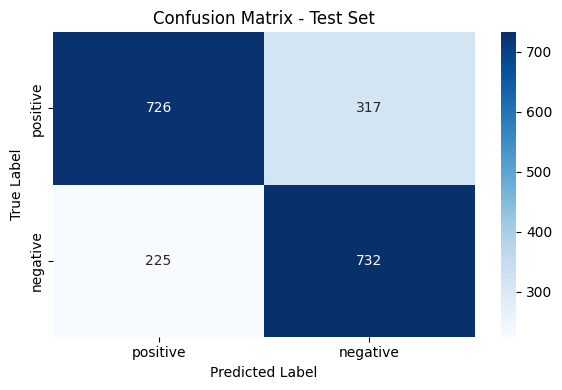

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Transform and predict on the test set
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector)

# Compute main metrics
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y, pos_label='positive')
recall = recall_score(test_y, pred_y, pos_label='positive')
f1 = f1_score(test_y, pred_y, pos_label='positive')

# Display metrics in a table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})
metrics_df['Score'] = metrics_df['Score'].apply(lambda x: f"{x:.4f}")
print("🔍 Evaluation Metrics:")
display(metrics_df)

# Print full classification report
print("\n📋 Detailed Classification Report:")
print(classification_report(test_y, pred_y))

# Confusion matrix visualization
conf_matrix = confusion_matrix(test_y, pred_y, labels=['positive', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
